In [1]:
from sklearn.datasets import load_iris

In [2]:
# 붓꽃 데이터셋
# 3종의 붓꽃에 대해 꽃잎과 꽃받침의 길이와 너비를 특징으로 가진 데이터셋
# 분류 문제에서 많이 사용

iris = load_iris()
X_iris, y_iris = iris.data, iris.target

In [ ]:
print(iris.data)

In [ ]:
print(iris.target)

In [ ]:
print(iris.feature_names)
print(iris.target_names)

In [ ]:
print(iris.DESCR)

In [ ]:
iris.filename

In [ ]:
y_iris.shape

In [ ]:
import numpy as np

iris_array = np.array(iris)

In [ ]:
iris_array

In [ ]:
import pandas as pd

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd

In [ ]:
iris_name = pd.DataFrame(y_iris)
iris_name

In [ ]:
iris_name.rename(columns={'0' : 'iris_class'})

In [ ]:
iris_pd1 = pd.concat([iris_pd, iris_name], axis=1)

In [ ]:
setosa_feature = iris_pd1[:50]
versicolor_feature = iris_pd1[50:100]
virginica_feature = iris_pd1[100:]

In [ ]:
import matplotlib.pyplot as plt

# sepal = 꽃받침, petal = 꽃잎
sepal_length = iris_pd['sepal length (cm)']
sepal_width = iris_pd['sepal width (cm)']
petal_length = iris_pd['petal length (cm)']
petal_width = iris_pd['petal width (cm)']

# 전체 데이터 그래프
plt.scatter(sepal_length, sepal_width)
plt.scatter(petal_length, petal_width)
plt.xlabel('Length(cm)')
plt.ylabel('Width(cm)')
plt.show()

In [ ]:
# iris 종류별 그래프
# setosa_feature = iris_pd1[:50]
plt.scatter(sepal_length[:50], sepal_width[:50])
plt.scatter(petal_length[:50], petal_width[:50])
plt.xlabel('Length(cm)')
plt.ylabel('Width(cm)')
plt.show()

# versicolor_feature = iris_pd1[50:100]
plt.scatter(sepal_length[50:100], sepal_width[50:100])
plt.scatter(petal_length[50:100], petal_width[50:100])
plt.xlabel('Length(cm)')
plt.ylabel('Width(cm)')
plt.show()

# virginica_feature = iris_pd1[100:]
plt.scatter(sepal_length[100:], sepal_width[100:])
plt.scatter(petal_length[100:], petal_width[100:])
plt.xlabel('Length(cm)')
plt.ylabel('Width(cm)')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 인스턴스 생성
kn = KNeighborsClassifier()

# 학습
kn.fit(X_iris, y_iris)

# 평가
kn.score(X_iris, y_iris)

In [ ]:
X_iris[0]

In [ ]:
a = 0

for i in X_iris:
    print(a, 'class:', kn.predict([i]), 'feature:', X_iris[a])
    a += 1

In [ ]:
for n in range(1,20+1):
    # 모델 인스턴스 생성
    kn = KNeighborsClassifier(n_neighbors=n)
    # 학습
    kn.fit(X_iris, y_iris)
    # 평가
    print('이웃수:%d ' %n, kn.score(X_iris, y_iris))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_target, y_target = train_test_split(X_iris, y_iris, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_target.shape)
print(y_target.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, X_target)
model.score(y_train, y_target)

In [ ]:
model.predict([[10, 4, 2, 1]])

In [ ]:
plt.scatter(petal_length[:50], petal_width[:50])
plt.scatter(petal_length[50:100], petal_width[50:100])
plt.scatter(petal_length[100:], petal_width[50:100])
plt.scatter(2, 1, marker='+')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

In [ ]:
distances, indexes = model.kneighbors([[10, 4, 2, 1]])
print(distances)
print(indexes)

In [ ]:
print(X_train[74])
print(X_train[10])
print(X_train[109])
print(X_train[97])
print(X_train[4])

In [ ]:
mean = np.mean(X_train, axis=0)  # feature column별 평균
std = np.std(X_train, axis=0)  # 표준편차
# print(mean, std)
X_train_scaled = (X_train - mean) / std
print(X_train_scaled)

In [ ]:
y_scaled = (y_train - mean) / std
y_scaled

In [ ]:
model.fit(X_train_scaled, X_target)
model.score(y_scaled, y_target)

In [ ]:
model.predict([[10, 4, 2, 1]])

In [ ]:
distances, indexes = model.kneighbors([[10, 4, 2, 1]])
print(distances)
print(indexes)

In [ ]:
# 회귀모델 R^2
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, X_target)
knr.score(y_train, y_target)

In [ ]:
# 평균 절대값 오차 확인
from sklearn.metrics import mean_absolute_error

y_predict = knr.predict(y_train)
# print(y_predict)

mae = mean_absolute_error(y_target, y_predict)

print(mae)

In [ ]:
print(knr.score(X_train, X_target))  # 훈련데이터점수
print(knr.score(y_train, y_target))  # 테스트데이터점수

In [ ]:
a = 1
# x = np.arange(50, 100).reshape(-1,1)

for k in range(75, 85):
    knr.n_neighbors = k
    knr.fit(X_train, X_target)
    X_score = knr.score(X_train, X_target)
    y_score = knr.score(y_train, y_target)
    print(f'{k}: {X_score} {y_score} {X_score-y_score}')
    a += 1

    # pred = knr.predict(x)

    # plt.scatter(X_train, X_target)
    # plt.plot(x, pred)
    # plt.show()


In [ ]:
iris.data

In [ ]:
# 다중 선형 회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, X_target)

print(lr.score(X_train, X_target))
print(lr.score(y_train, y_target))

In [ ]:
print(lr.coef_)
print(lr.intercept_)

In [ ]:
lr.predict([[10, 4, 2, 1]])

In [ ]:
# PolynomialFeatures 활용하기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
train_poly[:1]

In [ ]:
poly.transform([[2,3,4,5]])

In [ ]:
test_poly = poly.transform(y_train)
test_poly[:1]

In [ ]:
lr.fit(train_poly, X_target)
print(lr.score(train_poly, X_target))
print(lr.score(test_poly, y_target))

In [ ]:
# degree 5로 설정
poly = PolynomialFeatures(degree=5, include_bias=False)

In [ ]:
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

In [ ]:
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(y_train)

In [ ]:
lr.fit(train_poly, X_target)
print(lr.score(train_poly, X_target))
print(lr.score(test_poly, y_target))

In [ ]:
# 특성 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
lr.fit(train_scaled, X_target)
print(lr.score(train_scaled, X_target))
print(lr.score(test_scaled, y_target))

In [ ]:
# 릿지회귀
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, X_target)
print(ridge.score(train_scaled, X_target))
print(ridge.score(test_scaled, y_target))

In [ ]:
train_score = []
test_score = []

# 적용해볼 alpha 값 리스트
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for a in alpha_list:

    #릿지 모델 생성
    ridge = Ridge(alpha = a)

    #릿지 모델 훈련
    ridge.fit(train_scaled, X_target)

    #훈련점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, X_target))
    test_score.append(ridge.score(test_scaled, y_target))

print(train_score)
print(test_score)

In [ ]:
# 릿지회귀 그래프
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
print(alpha_list)
print(np.log10(alpha_list))

In [ ]:
# 로그함수 적용하여 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('log10 alpha')
plt.ylabel('R^2')
plt.show()


In [ ]:
# 최적alpha값 설정
ridge = Ridge(alpha = 0.007)
ridge.fit(train_scaled, X_target)
print(ridge.score(train_scaled, X_target))
print(ridge.score(test_scaled, y_target))

In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, X_target)
print(lasso.score(train_scaled, X_target))
print(lasso.score(test_scaled, y_target))

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for a in alpha_list:

    # 라쏘 모델을 생성 및 훈련
    lasso = Lasso(alpha = a, max_iter=1000)
    lasso.fit(train_scaled, X_target)

    train_score.append(lasso.score(train_scaled, X_target))
    test_score.append(lasso.score(test_scaled, y_target))

print(train_score)
print(test_score)



In [ ]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, X_target)

print(dtc.score(X_train, X_target))
print(dtc.score(y_train, y_target))

In [ ]:
# 특성 스케일 불필요
# dtc = DecisionTreeClassifier(random_state=42)
# dtc.fit(train_scaled, X_target)

# print(dtc.score(train_scaled, X_target))
# print(dtc.score(test_scaled, y_target))

In [ ]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtc)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dtc, max_depth=1, filled=True, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

In [ ]:
# 가지치기
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train, X_target)

print(dtc.score(X_train, X_target))
print(dtc.score(y_train, y_target))

In [ ]:
# 트리 구조 시각화

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

In [ ]:
# 특성 중요도 확인 (sepal_length, sepal_width, petal_length, petal_width)
# print(dtc.feature_names_in_)
print(dtc.feature_importances_)

In [ ]:
# 최소 불순도로 가지치기
dtc = DecisionTreeClassifier(min_impurity_decrease=0.05, random_state=42)
dtc.fit(X_train, X_target)

print(dtc.score(X_train, X_target))
print(dtc.score(y_train, y_target))

In [ ]:
# 트리 시각화
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

### K-means

In [15]:
feature_data = iris.data
# iris.feature_names
feature_data.shape

(150, 4)

In [98]:
iris_2d = feature_data.reshape(-1, 150*4)
iris_2d.shape

(1, 600)

In [26]:
# KMeans 라이브러리 불러오기
from sklearn.cluster import KMeans
import numpy as np

In [21]:
# k-Means 객체생성 (클러스터 수 = 3)
km = KMeans(n_clusters=3, random_state=43)

# 학습하기
km.fit(feature_data)

KMeans(n_clusters=3, random_state=43)

In [35]:
# 레이블 및 형태 확인
km.labels_, km.labels_.shape

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]),
 (150,))

In [27]:
# 종류별 개수 확인
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([62, 50, 38], dtype=int64))

In [90]:
def draw_hit_iris(arr, ratio=3):
    n = len(arr)  # n은 샘플 개수

    # 한 줄에 5개씩 이미지를 그린다.
    rows = int(np.ceil(n/5))

    # 행이 1개 이면 열 개수는 샘플 개수
    cols = n if rows < 2 else 5

    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            idx = i * 5 + j
            if idx < n:  # n 개까지만 그린다.
                data = arr[idx].reshape(2,2)  # 2x2 히트맵으로 변환
                im = axs[i, j].imshow(data, cmap='magma', vmin=np.min(arr), vmax=np.max(arr))
                # 색상 맵 (예: 'viridis', 'plasma', 'inferno', 'magma')

                # 텍스트 추가
                for (k, l), val in np.ndenumerate(data):
                    axs[i, j].text(l, k, f'{val:.2f}', ha='center', va='center', color='white' if val < (np.max(arr) + np.min(arr)) / 2 else 'black')

            axs[i, j].axis('off')
    
    #컬러바 추가
    cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
    
    plt.show()

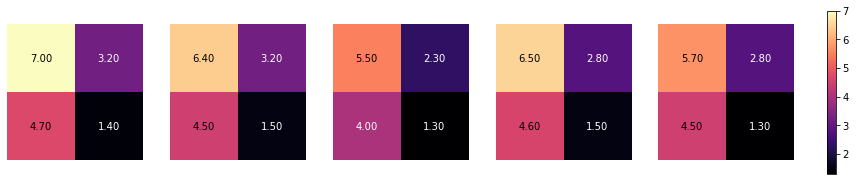

In [91]:
draw_hit_iris(feature_data[km.labels_ == 0][:5])

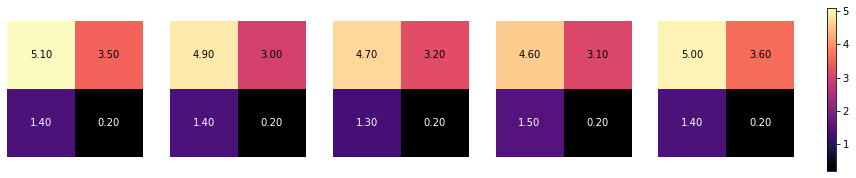

In [92]:
draw_hit_iris(feature_data[km.labels_ == 1][:5])

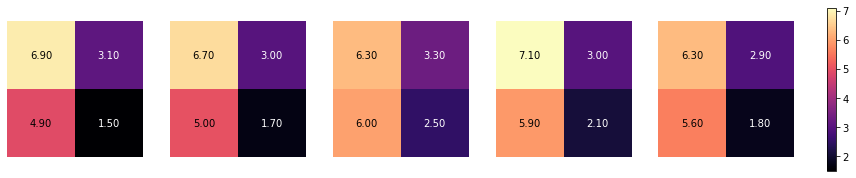

In [93]:
draw_hit_iris(feature_data[km.labels_ == 2][:5])

In [94]:
def draw_bar_iris(arr, ratio=2):
    n = len(arr)

    rows = int(np.ceil(n/8))

    cols = n if rows < 2 else 8

    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            idx = i * 8 + j
            if idx < n:
                axs[i, j].bar(range(len(arr[idx])), arr[idx])
            # axs[i, j].axis('off')
    plt.show()


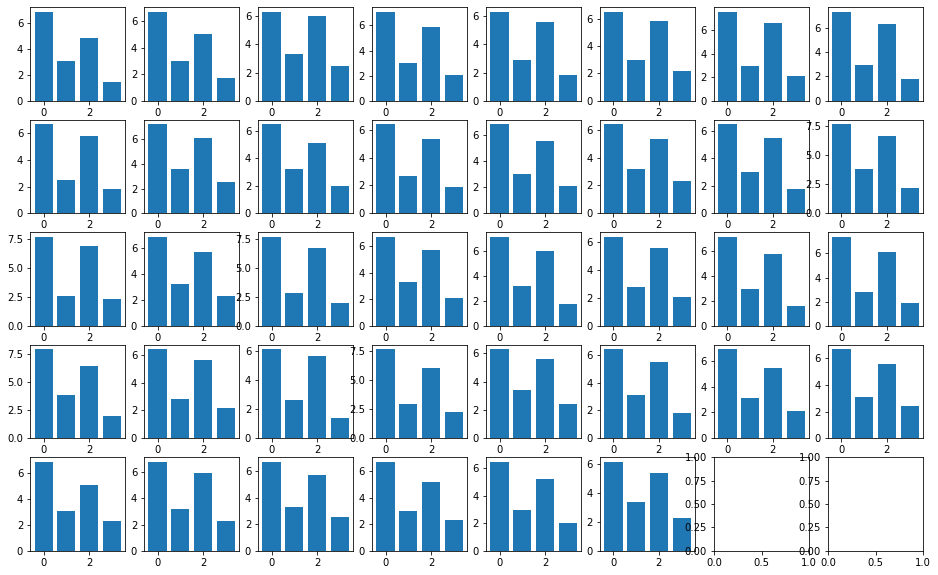

In [95]:
draw_bar_iris(feature_data[km.labels_ == 2])